# Assignment 3: Reinforcement Learning
In this assignment you will apply the RL algorithms you learnt from the tutorials to a simulated robot car in a pybullet environment.

You will be asked to (percentages are allocation of assignment marks):
* Train the robot to drive to the green goal marker which spawns at random locations (60%)
* Modify the epsilon-greedy function to incorporate prior knowledge (20%)
* Modify the reward function (10%)
* Add obstacles to the environment (10%)

It is highly recommended to install pybullet and run your code locally since things will run much faster. It will also make editing the gym environment code easier.



## Simple Car Environment
---

![simple_car.gif](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExODU0NmVlMzU1MGU1YzJjMjA5ODE5NjM0MTg0MTU1ZmM1OTA1NzRkNCZjdD1n/VI3OuvQShK3gzENiVz/giphy.gif)

*(code for this tutorial adapted from: https://gerardmaggiolino.medium.com/creating-openai-gym-environments-with-pybullet-part-2-a1441b9a4d8e*)

---

This is a simple car environment with a continuous state space and discrete action space with the goal of driving towards a green marker. Driving within 1.5 metres of the green marker causes the episode to end or if a certain amount of time has passed.

We can instantiate the environment as follows:


```
env = gym.make('SimpleDriving-v0', apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='tp_camera')
```


### Action Space

*   0: Reverse-Left
*   1: Reverse
*   2: Reverse-Right
*   3: Steer-Left (no throttle)
*   4: No throttle and no steering
*   5: Steer-Right (no throttle)
*   6: Forward-right
*   7: Forward
*   8: Forward-left

### Observation Space
Two dimensional array with distance in (x, y) from goal position.

###Rewards
Negative euclidean distance from the goal.

### Interacting with the Environment
We can sample actions randomly, get the agent to perform that action and then observe how the environment state changes:
```
state = env.reset()  # this needs to be called once at the start before sending any actions
action = env.action_space.sample()
state, reward, done, _, info = env.step(action)
```


---

## Installing and Modifying Gym Environment Code

For installing in collab you would have already been familiar with using the following command:
```
pip install git+https://github.com/fredsukkar/simple-car-env-template
```

To edit the gym environment first create a github account and then go to https://github.com/fredsukkar/simple-car-env-template and create a new repository using the repository as a template as follows:
![sdlfk](https://i.ibb.co/MMsLv1G/github-template.jpg)


Once you have your own copy of the repository you can then edit the files in the browser via github or alternatively (recommended) you can [clone the repository](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) and modify the code locally.

To install the package from github you can use the usual:
```
pip install git+https://github.com/<your repo>
```

To install the package locally:
```
cd /path/to/cloned_repo
python setup.py install
```

Note that for both methods you will need to install the package again after you've made any changes for them to take any effect.

The main file you will be modifying is: https://github.com/fredsukkar/Gym-Medium-Post/blob/main/simple_driving/envs/simple_driving_env.py.

There are four main functions that you have been calling via the gym environment object:
```
class SimpleDrivingEnv(gym.Env):
    metadata = {'render.modes': ['human']}  
  
    def __init__(self):
        pass

    def step(self, action):
        pass

    def reset(self):
        pass

    def render(self):
        pass
```

Parts 3 and 4 of the assignment will ask you to modify one of these functions.

---

Before we can execute any code we first need to install the following packages:

In [1]:
%pip install gym==0.26.2 pyvirtualdisplay pygame torch > /dev/null 2>&1
%pip install git+https://github.com/BlakeMuchmore01/AIIR-MQ3-Car-Env.git > /dev/null 2>&1
# %pip install git+https://github.com/fredsukkar/simple-car-env-template > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y xvfb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


Now import the necessary packages and following helper functions (you don't need the `display_video` function if running locally):

In [2]:
import os
os.environ['PYVIRTUALDISPLAY_DISPLAYFD'] = '0' 

import gym
import simple_driving
# import pybullet_envs
import pybullet as p
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math
from collections import defaultdict
import pickle
from IPython.display import clear_output
import torch
import random

display = Display(visible=0, size=(400, 300))
display.start()

def display_video(frames, framerate=30):
  """Generates video from `frames`.

  Args:
    frames (ndarray): Array of shape (n_frames, height, width, 3).
    framerate (int): Frame rate in units of Hz.

  Returns:
    Display object.
  """
  height, width, _ = frames[0].shape
  dpi = 70
  orig_backend = matplotlib.get_backend()
  matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
  fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
  matplotlib.use(orig_backend)  # Switch back to the original backend.
  ax.set_axis_off()
  ax.set_aspect('equal')
  ax.set_position([0, 0, 1, 1])
  im = ax.imshow(frames[0])
  def update(frame):
    im.set_data(frame)
    return [im]
  interval = 1000/framerate
  anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                  interval=interval, blit=True, repeat=False)
  return HTML(anim.to_html5_video())

pybullet build time: Nov 28 2023 23:51:11


## Part 1

Train the robot to drive to the green goal marker. Use any of the RL algorithms you learnt in the tutorials.

You can save the model after training to save you having to retrain everytime you open colab:
```
from google.colab import drive
drive.mount('/content/drive')
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/simple_driving_qlearning.pkl")  # this will save to folder "Colab Notebooks" on your google drive
```

You can then load the model:
```
model.load_state_dict(torch.load("/content/drive/My Drive/Colab Notebooks/simple_driving_qlearning.pkl"))
```

Once loaded you can even continue your training again using the learnt weights, that way you don't have to start from scratch again if you decide you want to train for longer. But keep in mind the epsilon greedy function will start from completely random again so you might want to set epsilon starting value appropriately.

## Part 2

Incorporate prior knowledge into the epsilon-greedy function by choosing a non-uniform distribution to sample from when performing exploration. For example, for training flappy bird we used the following to sample flapping actions less often to avoid flying off into the sky during early stages of training:

```
return np.random.choice(np.array(range(2)), p=[0.9,0.1])
```

Note that you will need to change the parameters to suit the car's action space and also choose a suitable distribution.

## Part 3

Modify the reward to give a bonus of 50 if the goal is reached. You can do this either in the `simulate` function or directly by modifying the `step` function in the gym environment code.


## Part 4

Add obstacles to the environment. You can do this by modifying the `reset` function in the gym environment code. For example you can add objects as follows:
```
self.obstacle = self._p.loadURDF(fileName=<path to urdf file here>,
                   basePosition=[0, 0, 0])
```

An example urdf file: https://github.com/fredsukkar/simple-car-env-template/blob/main/simple_driving/resources/simplegoal.urdf

**Note:** you will need to add features to your state so that the agent learns to avoid obstacles. For example, you could add the x, y distance from the agent to the closest obstacle in the environment. Then your state would become: `[x_goal, y_goal, x_obstacle, y_obstacle]`.

---

Here is some code to help you get started.

In [3]:
## Hyperparameters
EPISODES = 2500                  # Number of episodes to run for training
LEARNING_RATE = 0.00025          # Learning rate for optimizing neural network weights
MEM_SIZE = 50000                 # Maximum size of replay memory
REPLAY_START_SIZE = 10000        # Amount of samples to fill replay memory before training
BATCH_SIZE = 32                  # Number of samples to draw from replay memory for training
GAMMA = 0.99                     # Discount factor for future rewards
EPSILON_START = 0.1              # Starting exploration rate
EPSILON_END = 0.0001             # Final exploration rate
EPSILON_DECAY = 4 * MEM_SIZE     # Decay rate for exploration rate
MEM_RETAIN = 0.1                 # Percentage of memory to retain on each episode
NETWORK_UPDATE_ITERS = 5000      # Number of steps to update target network

FC1_DIMS = 128                   # Number of neurons in our MLP's first hidden layer
FC2_DIMS = 128                   # Number of neurons in our MLP's second hidden layer

# Metrics for displaying training status
best_reward = 0
average_reward = 0
episode_history = []
episode_reward_history = []
np.bool = np.bool_

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Neural network class to approximate Q-values
class Network(torch.nn.Module):
    def __init__(self, env):
        super().__init__()
        self.input_shape = env.observation_space.shape
        self.action_space = env.action_space.n

        # build an MLP with 2 hidden layers
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(*self.input_shape, FC1_DIMS),   # input layer
            torch.nn.ReLU(),     # this is called an activation function
            torch.nn.Linear(FC1_DIMS, FC2_DIMS),    # hidden layer
            torch.nn.ReLU(),     # this is called an activation function
            torch.nn.Linear(FC2_DIMS, self.action_space)    # output layer
            )

        self.optimizer = optim.Adam(self.parameters(), lr=LEARNING_RATE)
        self.loss = nn.MSELoss()  # loss function

    def forward(self, x):
        return self.layers(x)

In [5]:
# Replay Buffer class for storing and retrieving sampled experiences
class ReplayBuffer:
    def __init__(self, env):
        # Initialising memory count and creating arrays to store experiences
        self.mem_count = 0
        self.states = np.zeros((MEM_SIZE, *env.observation_space.shape),dtype=np.float32)
        self.actions = np.zeros(MEM_SIZE, dtype=np.int64)
        self.rewards = np.zeros(MEM_SIZE, dtype=np.float32)
        self.states_ = np.zeros((MEM_SIZE, *env.observation_space.shape),dtype=np.float32)
        self.dones = np.zeros(MEM_SIZE, dtype=np.bool)

    def add(self, state, action, reward, state_, done):
        # If memory count is at max size, overwrite previous values
        if self.mem_count < MEM_SIZE:
            mem_index = self.mem_count
        else:
            # Avoiding catastrophic forgetting - retrain initial 10% of the replay buffer
            mem_index = int(self.mem_count % ((1-MEM_RETAIN) * MEM_SIZE) + (MEM_RETAIN * MEM_SIZE))

        self.states[mem_index]  = state     # Storing the state
        self.actions[mem_index] = action    # Storing the action
        self.rewards[mem_index] = reward    # Storing the reward
        self.states_[mem_index] = state_    # Storing the next state
        self.dones[mem_index] =  1 - done   # Storing the done flag
        self.mem_count += 1                 # Incrementing memory count
    
    def sample(self):
        # Randomly sample a batch of experiences
        MEM_MAX = min(self.mem_count, MEM_SIZE)
        batch_indices = np.random.choice(MEM_MAX, BATCH_SIZE, replace=True)

        states  = self.states[batch_indices]    # Getting the states
        actions = self.actions[batch_indices]   # Getting the actions
        rewards = self.rewards[batch_indices]   # Getting the rewards
        states_ = self.states_[batch_indices]   # Getting the next states
        dones   = self.dones[batch_indices]     # Getting the done flags

        # Returning the random sampled experiences
        return states, actions, rewards, states_, dones

In [6]:
class DQN_Solver:
    def __init__(self, env):
        self.memory = ReplayBuffer(env)     # Creating a replay buffer
        self.policy_network = Network(env)  # Q
        self.target_network = Network(env)  # \hat{Q}
        self.target_network.load_state_dict(self.policy_network.state_dict())  # Initially set weights of Q to \hat{Q}
        self.learn_count = 0    # keep track of the number of iterations we have learnt for

    # Epsilon-greedy policy
    def choose_action(self, observation):
        # Only start decaying epsilon once we start learning (once replay memory has REPLAY_START_SIZE samples)
        if self.memory.mem_count > REPLAY_START_SIZE:
            eps_threshold = EPSILON_END + (EPSILON_START - EPSILON_END) * \
                math.exp(-1. * self.learn_count / EPSILON_DECAY)
        else:
            eps_threshold = 1.0

        # If we rolled a value lower than the epsilon sample a random action
        if random.random() < eps_threshold:
            return np.random.choice(np.array(range(9)), p=[0.0, 0.1, 0.0, 0.1, 0.2, 0.1, 0.1, 0.3, 0.1])  # Random action with set priors
            #return np.random.choice(np.array(range(9)), p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1])  # Random action with set priors
        
        # Otherwise policy network (Q) chooses action with highest estimated Q value so far
        state = torch.tensor(observation).float().detach()
        state = state.unsqueeze(0)
        self.policy_network.eval()
        with torch.no_grad():
            q_values = self.policy_network(state)  # Get Q-values from policy network

        return torch.argmax(q_values).item()
    
    # Main training loop
    def learn(self):
        states, actions, rewards, states_, dones = self.memory.sample()  # Sample a batch of random experiences
        states = torch.tensor(states, dtype=torch.float32)      # Convert states to tensor
        actions = torch.tensor(actions, dtype=torch.long)       # Convert actions to tensor
        rewards = torch.tensor(rewards, dtype=torch.float32)    # Convert rewards to tensor
        states_ = torch.tensor(states_, dtype=torch.float32)    # Convert next states to tensor
        dones = torch.tensor(dones, dtype=torch.bool)           # Convert done flags to tensor
        batch_indices = np.arange(BATCH_SIZE, dtype=np.int64)   # Create an array of batch indices

        self.policy_network.train(True)
        q_values = self.policy_network(states)  # Get Q-value estimates from policy network
        q_values = q_values[batch_indices, actions]  # Get Q-values for the sampled actions

        self.target_network.eval()
        with torch.no_grad():
            q_values_next = self.target_network(states_)  # Get Q-values of states_ from target nework (Q_hat)

        q_values_next_max = torch.max(q_values_next, dim=1)[0]  # Max Q-values for next state
        q_target = rewards + GAMMA * q_values_next_max * dones  # Calculate target Q-values

        loss = self.policy_network.loss(q_values, q_target)  # Calculate loss from target Q-values and predicted Q-values

        # Compute gradients and update Q weights
        self.policy_network.optimizer.zero_grad()
        loss.backward()
        self.policy_network.optimizer.step()  # Update Q weights
        self.learn_count += 1  # Increment learn count

        # Set target network weights to policy networks wights every C steps
        if self.learn_count % NETWORK_UPDATE_ITERS == NETWORK_UPDATE_ITERS - 1:
            print("Updating target network")
            self.update_target_network()
        
    def update_target_network(self):
        self.target_network.load_state_dict(self.policy_network.state_dict())

    def returning_epsilon(self):
        return self.exploration_rate

## Training Simple Car

/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(
/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/spaces/box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")


argv[0]=
argv[0]=
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to fill...
waiting for buffer to 

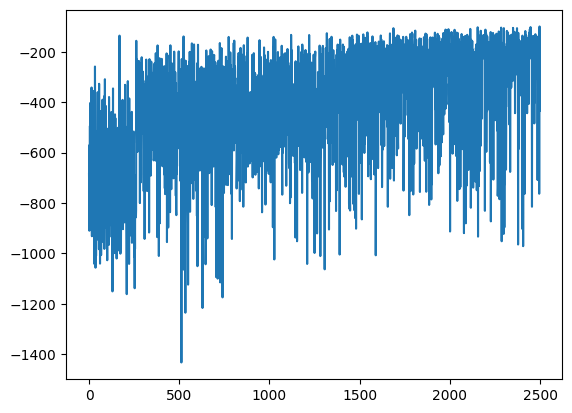

In [53]:
######################### renders image from third person perspective for validating policy ##############################
env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='tp_camera')
##########################################################################################################################

######################### renders image from onboard camera ###############################################################
# env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='fp_camera')
##########################################################################################################################

######################### if running locally you can just render the environment in pybullet's GUI #######################
# env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=True, isDiscrete=True)
##########################################################################################################################

env.action_space.seed(0)    # Set default seed for reproducibility
random.seed(0)              # ...
np.random.seed(0)           # ...
torch.manual_seed(0)        # ...
episode_batch_score = 0     # Initialize episode score
episode_reward = 0          # Initialize episode reward
agent = DQN_Solver(env)     # Create DQN agent
plt.clf()                   # Clear previous plot

for episode in range(EPISODES):
    state, info = env.reset()     # Reset environment

    while True:
        # Sampling random actions and add to replay buffer
        action = agent.choose_action(state)
        state_, reward, done, _, info = env.step(action)
        reward += -abs(state_[1])

        agent.memory.add(state, action, reward, state_, done)  # Add experience to replay buffer

        # Only start learning once replay memory has REPLAY_START_SIZE samples
        if agent.memory.mem_count > REPLAY_START_SIZE:
            agent.learn()

        state = state_  # Update state
        episode_batch_score += reward  # Update episode score
        episode_reward += reward  # Update episode reward

        if done:
            break

    episode_history.append(episode)
    episode_reward_history.append(episode_reward)
    episode_reward = 0  # Reset episode reward

    # Saving model every batches of 100 episodes
    if episode % 100 == 0 and agent.memory.mem_count > REPLAY_START_SIZE:
        save_path = os.path.join(os.getcwd(), "policy_network.pkl")
        torch.save(agent.policy_network.state_dict(), save_path)
        print("average total reward per episode batch since episode ", episode, ": ", episode_batch_score/ float(100))
        episode_batch_score = 0
    elif agent.memory.mem_count < REPLAY_START_SIZE:
        print("waiting for buffer to fill...")
        episode_batch_score = 0

plt.plot(episode_history, episode_reward_history)
plt.show()

## Testing Simple Car

/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(


argv[0]=
argv[0]=


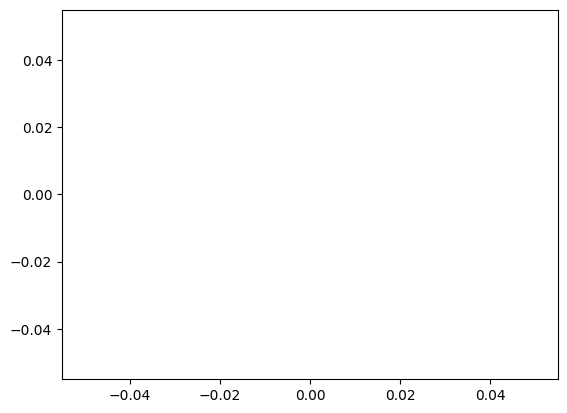

/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/blakemuchmorewsl/git/AIIR-MQ3/.venv/lib/python3.8/site-packages/gym/spaces/box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")


In [16]:
######################### renders image from third person perspective for validating policy ##############################
env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='tp_camera')
##########################################################################################################################

######################### renders image from onboard camera ###############################################################
# env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='fp_camera')
##########################################################################################################################

######################### if running locally you can just render the environment in pybullet's GUI #######################
# env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=True, isDiscrete=True)
##########################################################################################################################

plt.plot(episode_history, episode_reward_history)
plt.show()

agent = DQN_Solver(env)
agent.policy_network.load_state_dict(torch.load("policy_network.pkl"))
state, info = env.reset()
frames = []
frames.append(env.render())
agent.policy_network.eval()

while True:
    with torch.no_grad():
        q_values = agent.policy_network(torch.tensor(state, dtype=torch.float32))

    action = torch.argmax(q_values).item()  # Selecting action with highest pred q-value
    state, reward, done, _, info = env.step(action)
    frames.append(env.render())
    if done:
        break

env.close()
display_video(frames, framerate=5)  # remove if runnning locally